In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings ('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn. ensemble import RandomForestClassifier
import xgboost as xgb
import pickle

###importing data set

In [ ]:
df=pd.read_csv('/content/audit_data.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

###Data preparation


####Handling Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Sector_score  LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
0           False        False   False    False   False   False    False   
1           False        False   False    False   False   False    False   
2           False        False   False    False   False   False    False   
3           False        False   False    False   False   False    False   
4           False        False   False    False   False   False    False   
..            ...          ...     ...      ...     ...     ...      ...   
771         False        False   False    False   False   False    False   
772         False        False   False    False   False   False    False   
773         False        False   False    False   False   False    False   
774         False        False   False    False   False   False    False   
775         False        False   False    False   False   False    False   

     Risk_B  TOTAL  numbe

####Handling Categorical Data

In [ ]:
df.shape


(776, 27)

In [ ]:
# Assuming `df` is your dataset

# Find columns with object or string data type
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
['LOCATION_ID']


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your original dataset
categorical_col = 'LOCATION_ID'

# Apply label encoding
encoder = LabelEncoder()
encoded_col = encoder.fit_transform(df[categorical_col])

# Replace the original categorical column with the encoded column
df[categorical_col] = encoded_col

# You can also assign the encoded column to a new column if you want to keep the original column
# df['Encoded_LOCATION_ID'] = encoded_col


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df is your original dataset
categorical_col = 'LOCATION_ID'

# Apply label encoding
encoder = LabelEncoder()
df[categorical_col] = encoder.fit_transform(df[categorical_col])


In [ ]:
# Assuming `df` is your dataset

# Find columns with object or string data type
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Print the list of categorical columns
print("Categorical Columns:")
print(categorical_cols)


Categorical Columns:
[]


In [ ]:
df.shape

(776, 27)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    int64  
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [ ]:
df.value_counts()

Sector_score  LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  Risk_B  TOTAL  numbers  Score_B.1  Risk_C  Money_Value  Score_MV  Risk_D  District_Loss  PROB  RiSk_E  History  Prob  Risk_F  Score  Inherent_Risk  CONTROL_RISK  Detection_Risk  Audit_Risk  Risk
55.57         2            0.00    0.2      0.000   0.00    0.2      0.000   0.00   5.0      0.2        1.0     0.00         0.2       0.000   2              0.2   0.4     0        0.2   0.0     2.0    1.400          0.4           0.5             0.2800      0       4
              40           0.00    0.2      0.000   0.00    0.2      0.000   0.00   5.0      0.2        1.0     0.00         0.2       0.000   2              0.2   0.4     0        0.2   0.0     2.0    1.400          0.4           0.5             0.2800      0       3
              37           0.00    0.2      0.000   0.00    0.2      0.000   0.00   5.0      0.2        1.0     0.00         0.2       0.000   2              0.2   0.4     0        0.2   0.0     2.0

####Handling Outliers

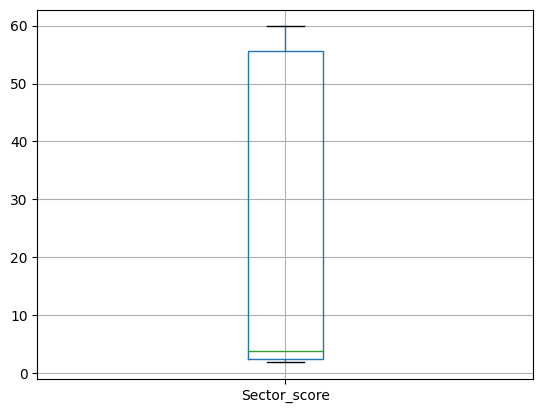

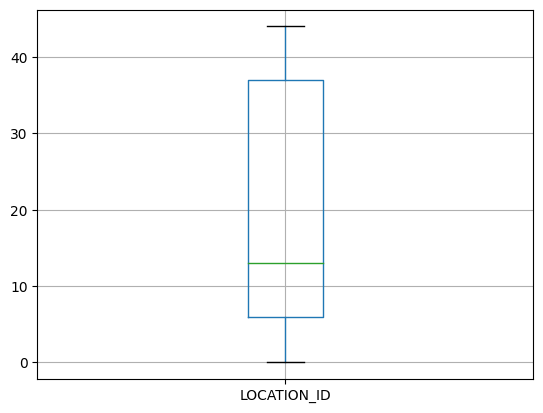

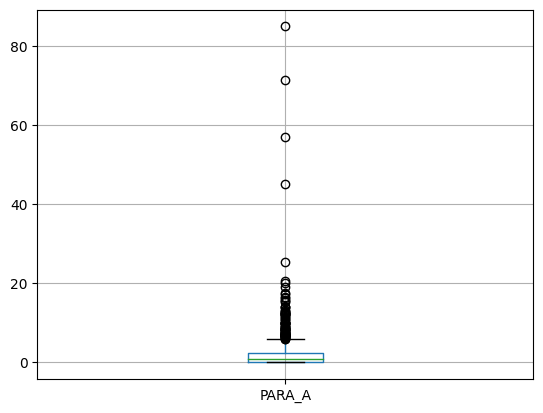

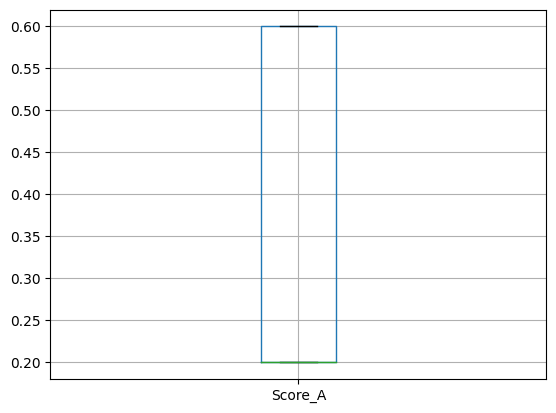

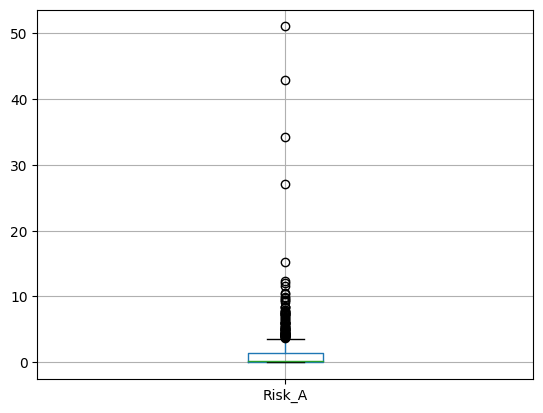

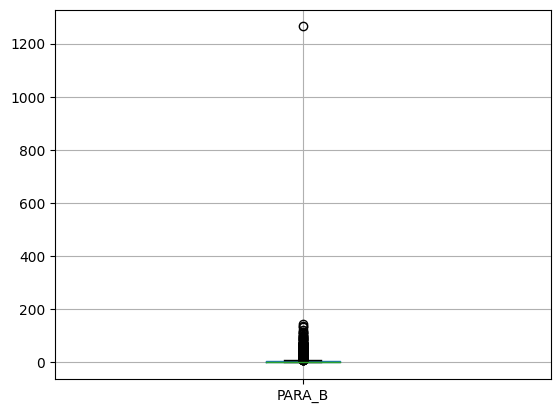

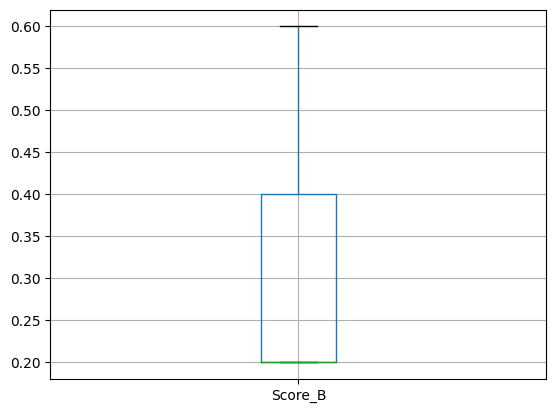

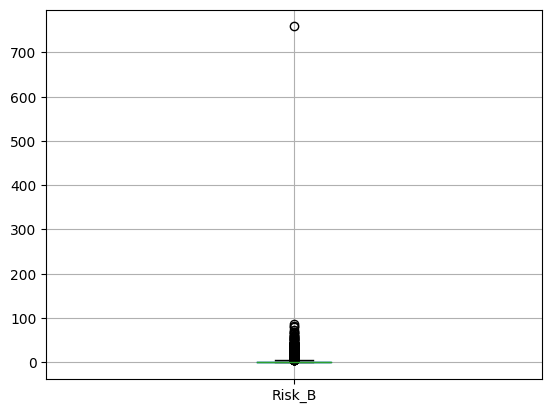

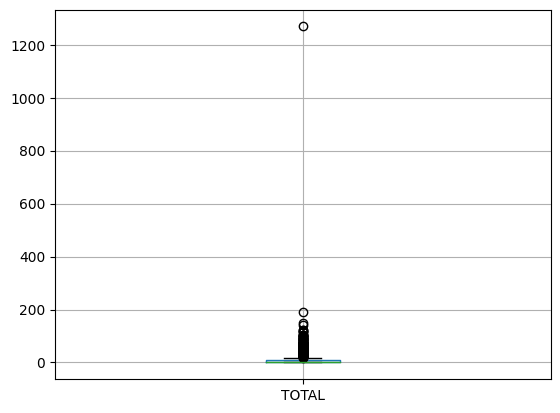

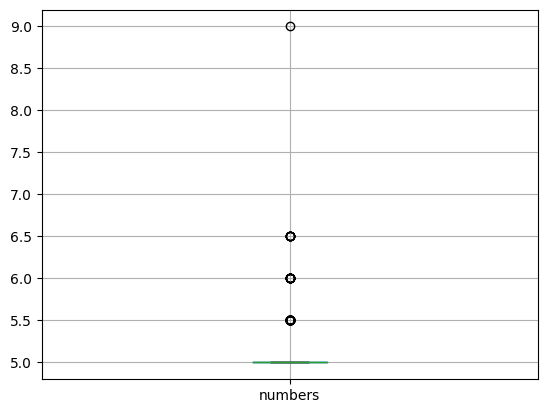

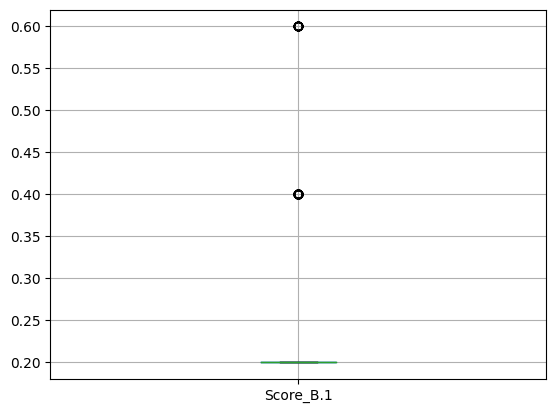

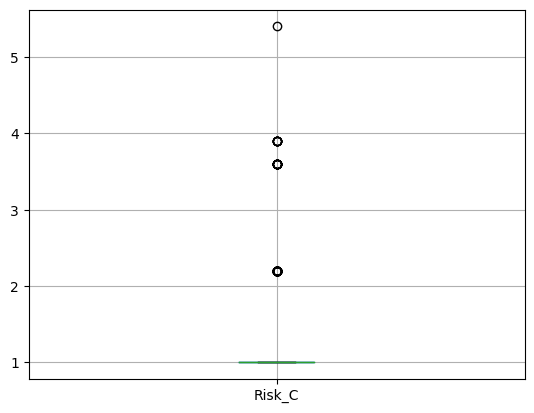

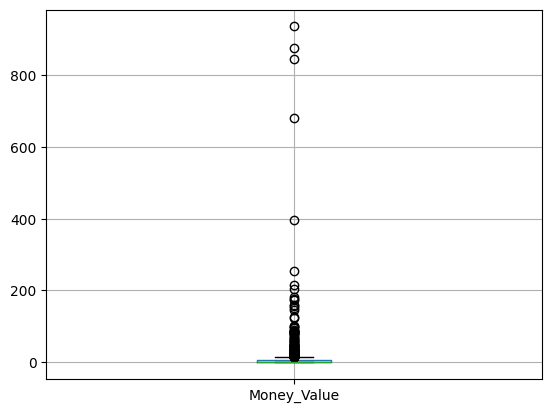

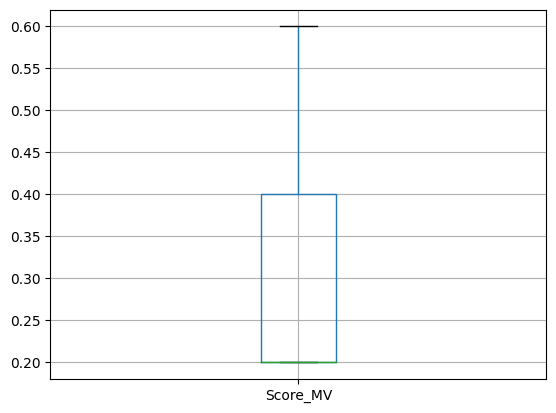

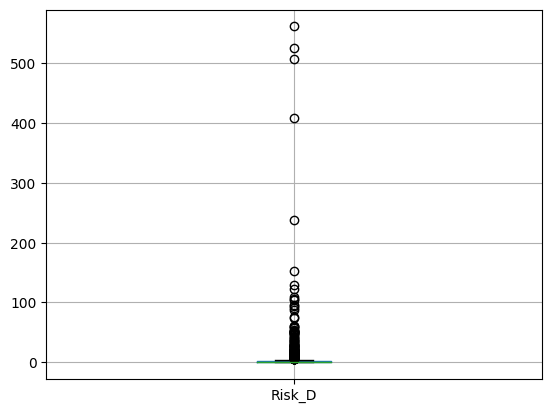

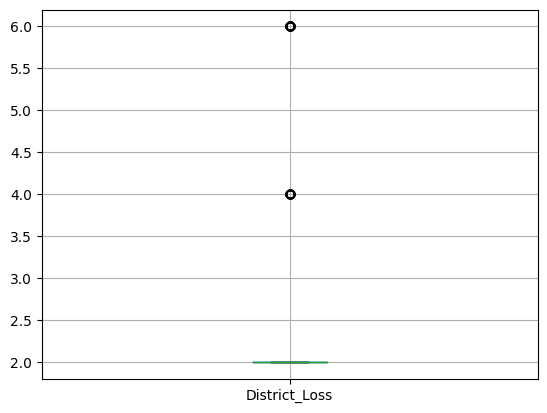

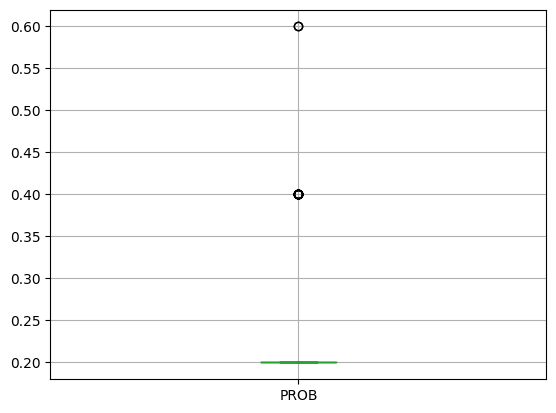

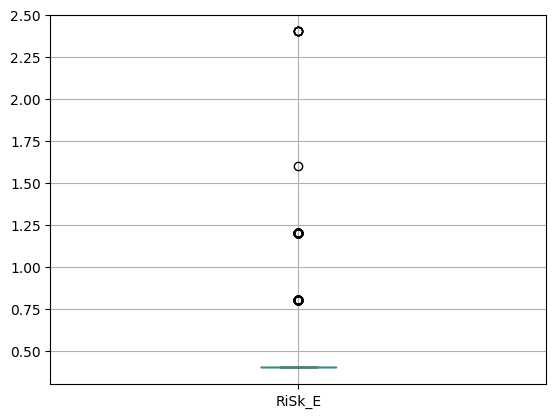

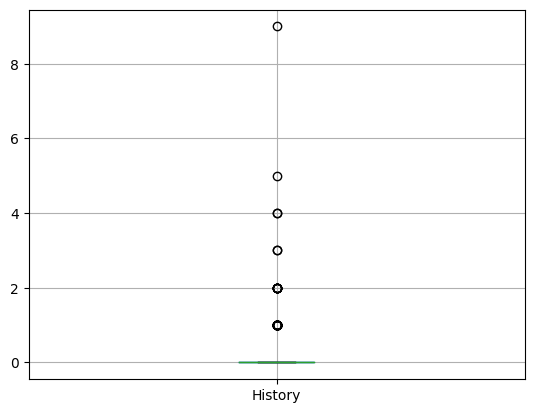

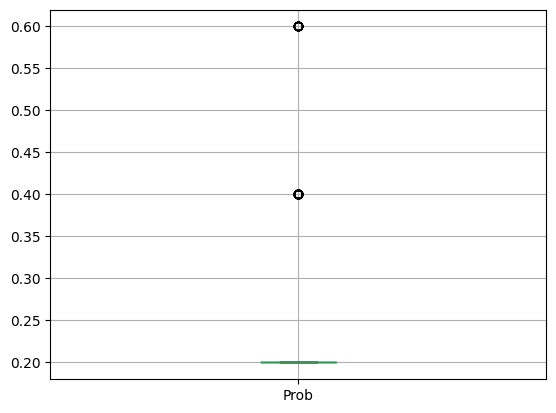

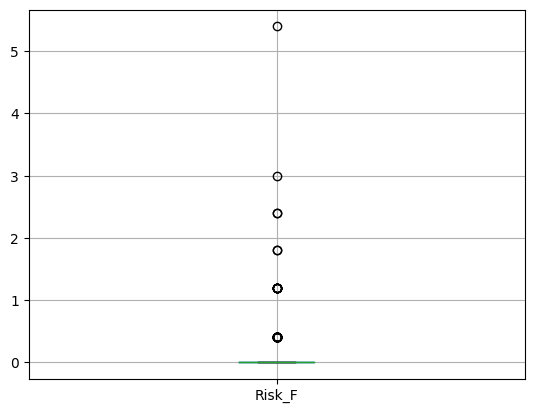

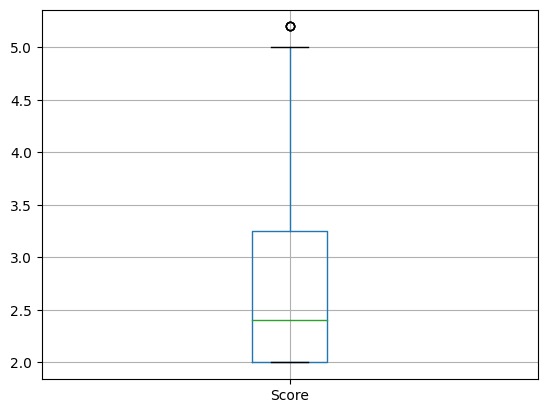

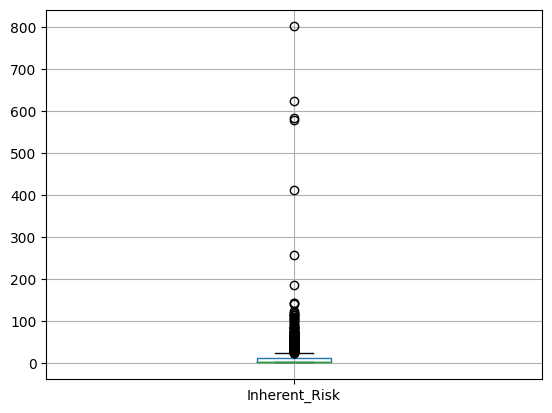

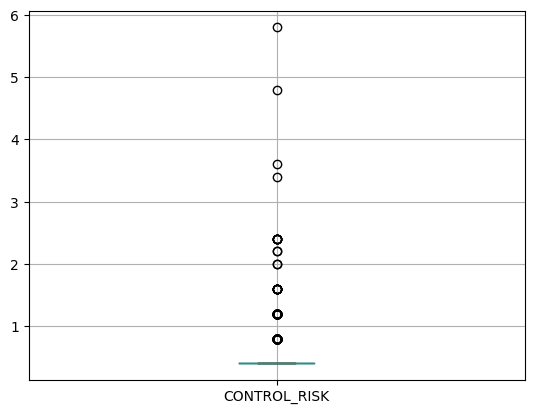

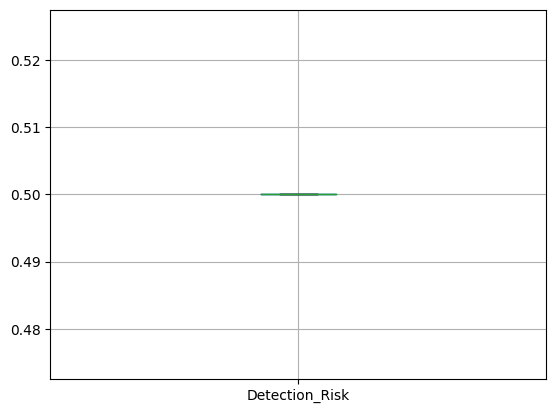

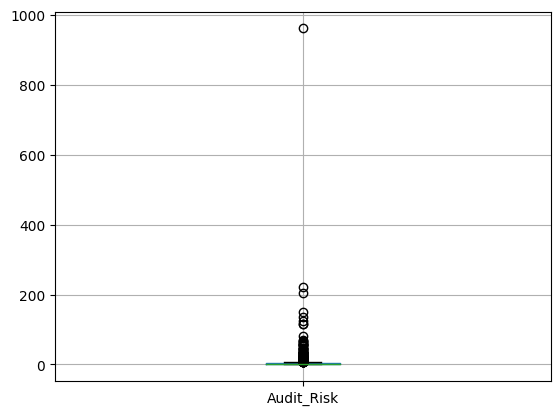

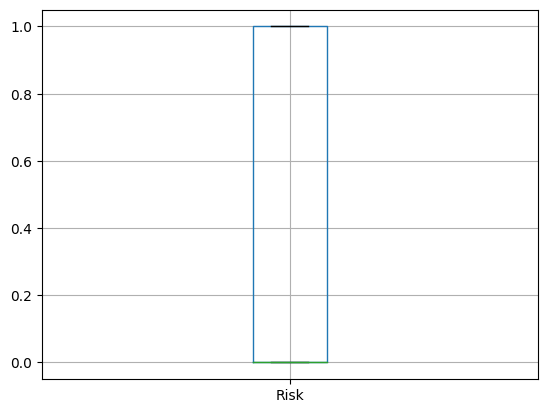

In [ ]:
for i in df.columns:
    df[[i]].boxplot()
    plt.show()

In [ ]:
def iqr(df):

    iqr= df.quantile (0.75) - df.quantile (0.25) 
    upper_range = df.quantile (0.75) + (1.5* iqr) 
    lower_range = df.quantile (0.25) - (1.5* iqr)
    return upper_range , lower_range

upper , lower =iqr(df)

In [ ]:
upper , lower

(Sector_score      135.37000
 LOCATION_ID        83.50000
 PARA_A              5.88500
 Score_A             1.20000
 Risk_A              3.65700
 PARA_B             10.40000
 Score_B             0.70000
 Risk_B              4.60125
 TOTAL              18.46250
 numbers             5.00000
 Score_B.1           0.20000
 Risk_C              1.00000
 Money_Value        13.98750
 Score_MV            0.70000
 Risk_D              5.58750
 District_Loss       2.00000
 PROB                0.20000
 RiSk_E              0.40000
 History             0.00000
 Prob                0.20000
 Risk_F              0.00000
 Score               5.12500
 Inherent_Risk      24.28350
 CONTROL_RISK        0.40000
 Detection_Risk      0.50000
 Audit_Risk          7.64970
 Risk                2.50000
 dtype: float64,
 Sector_score     -77.43000
 LOCATION_ID      -40.50000
 PARA_A            -3.19500
 Score_A           -0.40000
 Risk_A            -2.12700
 PARA_B            -6.24000
 Score_B           -0.10000
 Ris

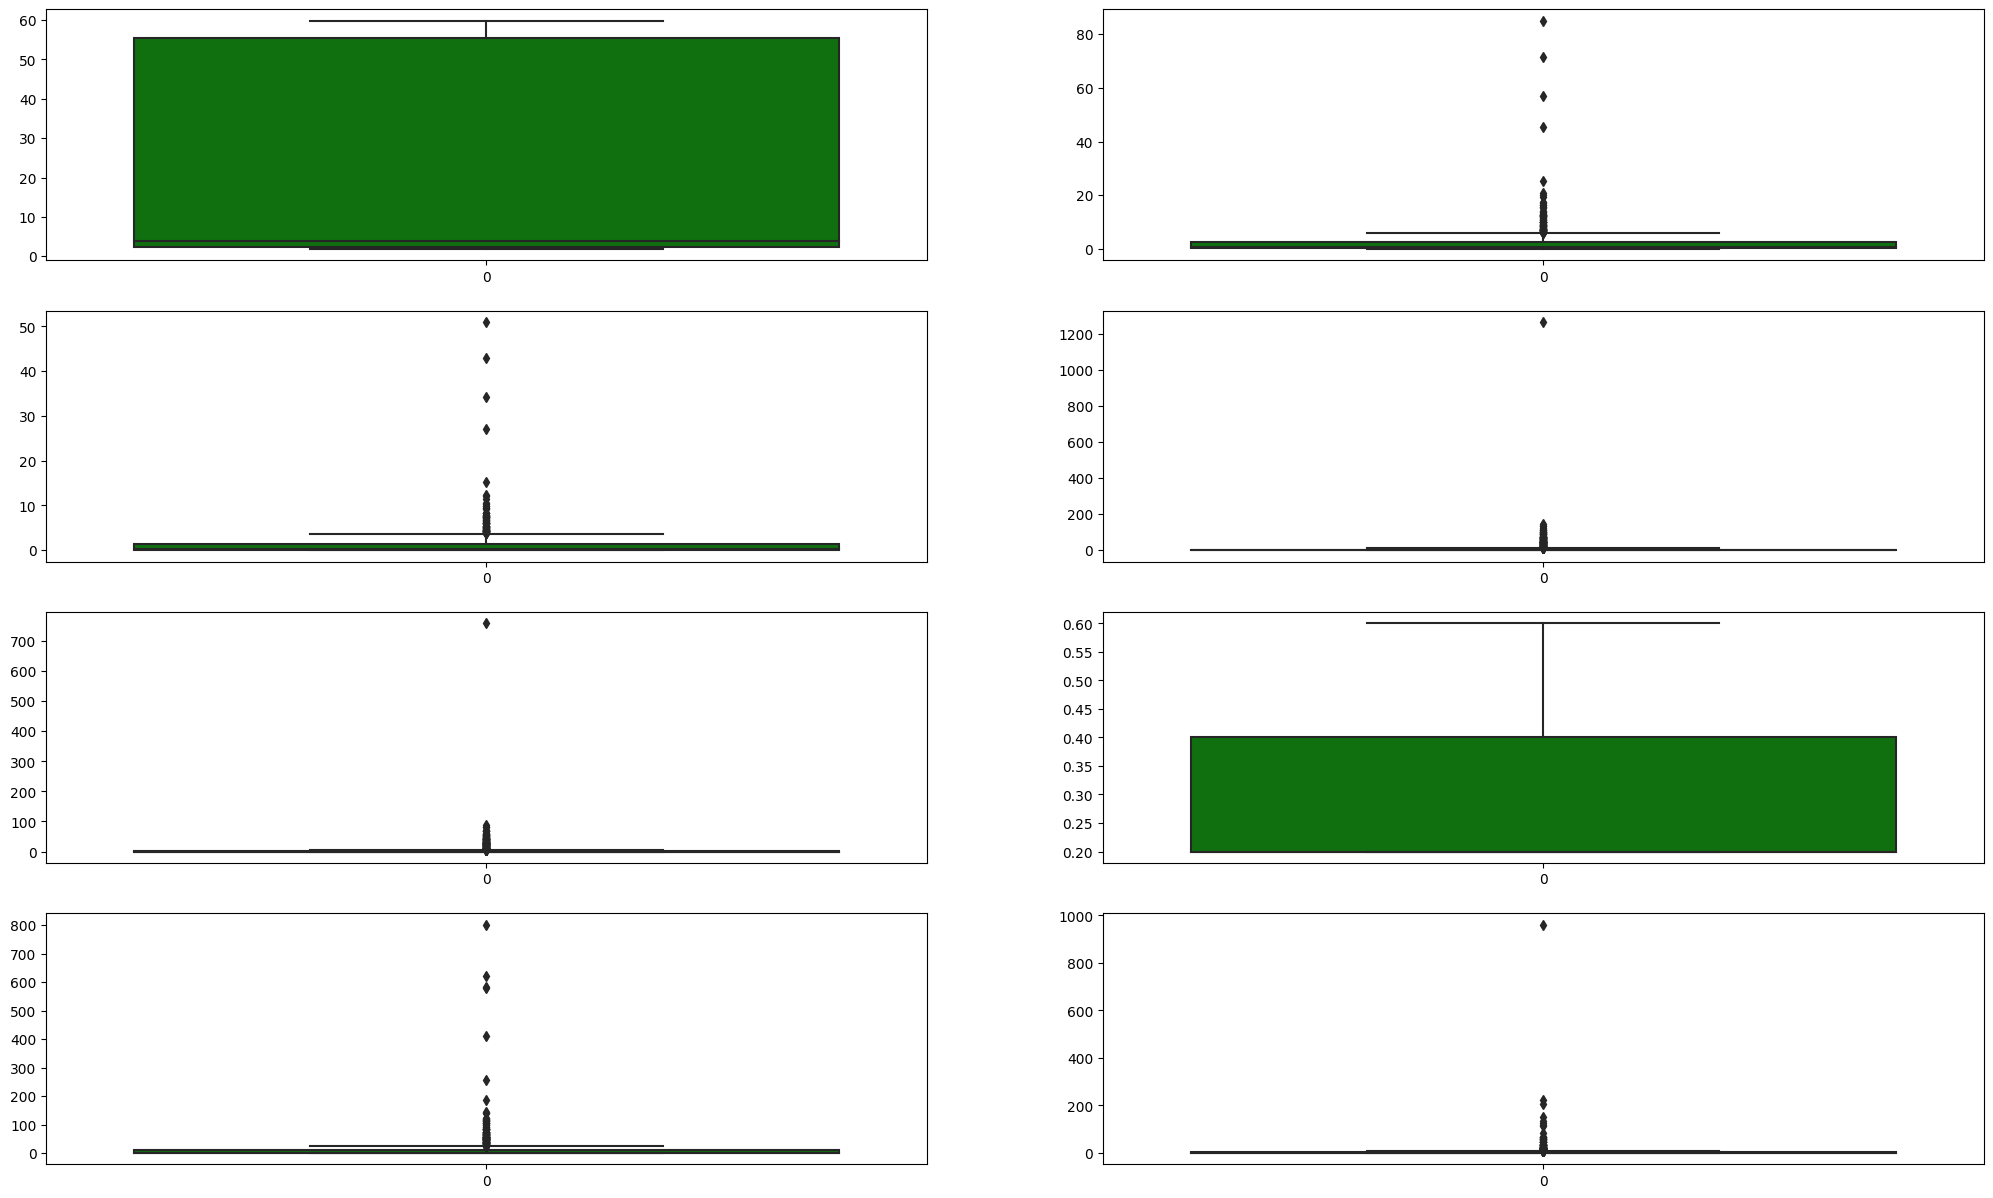

In [ ]:
#To handle the outliers transformation technique is used and some of the outliers in the data are reduced.
r = ['Sector_score', 'PARA_A', 'Risk_A',
     'PARA_B', 'Risk_B', 'Score_MV',
    'Inherent_Risk', 'Audit_Risk', 'Risk']

fig, ax = plt.subplots(4, 2, figsize=(25,15))
for i,subplot in zip(r,ax.flatten()):
    sns.boxplot(df[i],ax=subplot,color = 'g')

###Exploratory Data Analysis

####Descriptive Statistical



In [ ]:
df.describe

<bound method NDFrame.describe of      Sector_score  LOCATION_ID  PARA_A  Score_A  Risk_A  PARA_B  Score_B  \
0            3.89           14    4.18      0.6   2.508    2.50      0.2   
1            3.89           38    0.00      0.2   0.000    4.83      0.2   
2            3.89           38    0.51      0.2   0.102    0.23      0.2   
3            3.89           38    0.00      0.2   0.000   10.80      0.6   
4            3.89           38    0.00      0.2   0.000    0.08      0.2   
..            ...          ...     ...      ...     ...     ...      ...   
771         55.57           41    0.49      0.2   0.098    0.40      0.2   
772         55.57            6    0.47      0.2   0.094    0.37      0.2   
773         55.57            4    0.24      0.2   0.048    0.04      0.2   
774         55.57            8    0.20      0.2   0.040    0.00      0.2   
775         55.57            5    0.00      0.2   0.000    0.00      0.2   

     Risk_B  TOTAL  numbers  ...  RiSk_E  History  Pr

####Visual Analysis

##### Univariate analysis

In [ ]:
df['Risk'].unique()

array([1, 0])

<Axes: xlabel='Risk', ylabel='Count'>

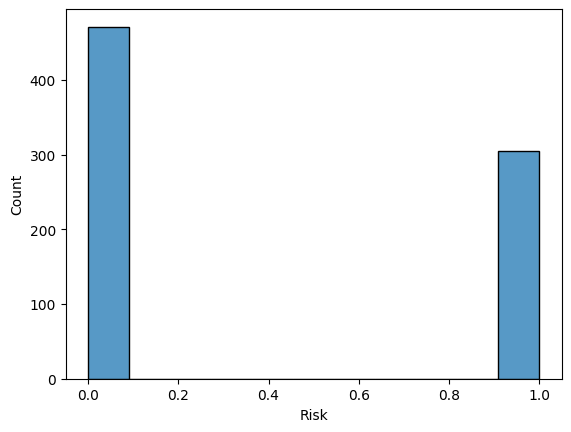

In [ ]:
#histogram
sns.histplot(df['Risk'])

<Axes: ylabel='count'>

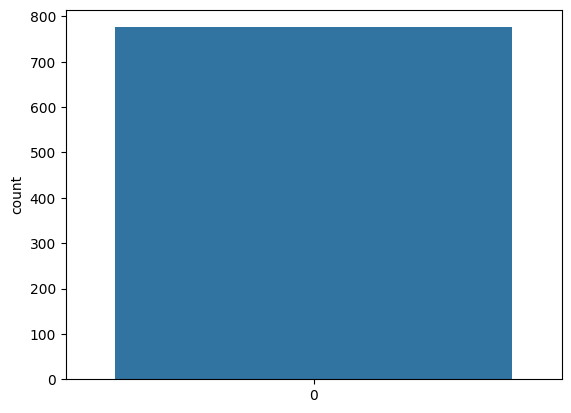

In [ ]:
sns.countplot(df['Risk'])


In [ ]:
plt.show()

##### Bivariate analysis

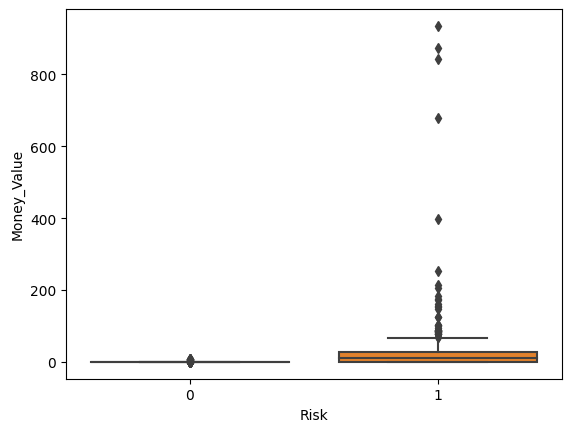

In [ ]:
# the relation between two features we use bivariate analysis box plot
# we are visualizing the relationship between Risk and Money value.
sns.boxplot (x='Risk', y='Money_Value', data=df) 
plt.show()

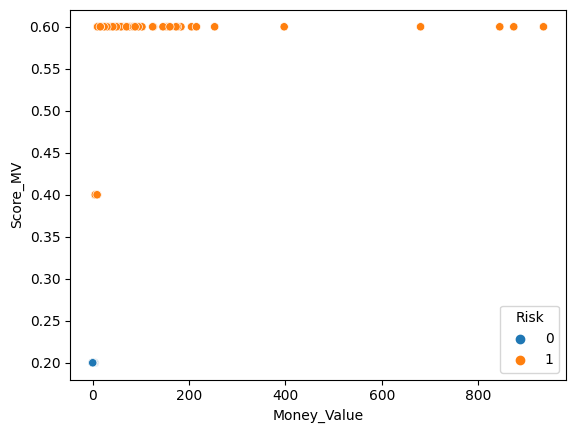

In [ ]:
#Here we are visualizing the relationship between Score value and Money value.
sns.scatterplot (x= 'Money_Value', y='Score_MV', hue='Risk', data=df) 
plt.show()

##### Multivariate analysis

In [ ]:
df_sample = df.sample(n=10, random_state=4)
sns.pairplot(df_sample)


KeyboardInterrupt: 

####Splitting data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=72)

In [ ]:
# Assuming you have a DataFrame called `df` with your features and target variable
x = df.drop('Risk', axis=1)  # Replace 'target_variable' with the name of your target column
y = df['Risk']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=72)

In [ ]:
len(x_train), len(x_test)

(543, 233)

In [ ]:
len(y_train), len(y_test)

(543, 233)

###Model Building


####Training The Model In Multiple Algorithms

#####Logistic Regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression()

from sklearn.impute import SimpleImputer

# Create an instance of the imputer with a desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data
x_train_imputed = imputer.fit_transform(x_train)

# Transform the evaluation data using the trained imputer
x_eval_imputed = imputer.transform(x_train)  # Replace 'x_eval' with your evaluation dataset variable

# Train the logistic regression model using the imputed training data
logi.fit(x_train_imputed, y_train)

# Make predictions on the evaluation data
y_eval_pred = logi.predict(x_eval_imputed)
print(y_eval_pred[:5])



[0 1 0 1 0]


#####Random forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy')

# Create an instance of the SimpleImputer with the desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the entire dataset
x_train_imputed = imputer.fit_transform(x_train)

# Fit the RandomForestClassifier on the imputed data
rfc.fit(x_train_imputed, y_train)


RandomForestClassifier(criterion='entropy')

In [ ]:
import numpy as np
np.isnan(x_train).sum()


Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [ ]:
x_train = x_train.dropna()
y_train = y_train[x_train.index]


In [ ]:
rfc.fit(x_train, y_train)


RandomForestClassifier(criterion='entropy')

In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of the imputer with a desired strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the training data for the 'Money_Value' column
x_train['Money_Value'] = imputer.fit_transform(x_train[['Money_Value']])


In [ ]:
y_train_pred = rfc.predict(x_train)

In [ ]:
y_train_pred[:5]

array([0, 1, 0, 1, 0])

##### Xgboost Boosting

In [ ]:
import xgboost as xgb

In [ ]:
model=xgb.XGBClassifier()

In [ ]:
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
## Evalution of Model with XG Boost Technique For Training Data
Xg_train_pred = model.predict(x_train)

In [ ]:
Xg_train_pred[:5]

array([0, 1, 0, 1, 0])

#####KNN model

In [ ]:
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on x_train
imputer.fit(x_train)

# Transform x_train by replacing missing values
x_train_imputed = imputer.transform(x_train)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train_imputed,y_train)

knn_train_pred=knn.predict(x_train_imputed)

####Testing The Model

In [ ]:
knn.predict([[2.37, 0.50, 3, 0.100, 0.04, 0.008, 0.54, 5.0, 0.000, 0.2, 6, 0.50, 2.4, 2.3080 ]])

#array([1], dtype=int64)

array([0])

In [ ]:
knn.predict([[1.85, 1.75, 0.700, 0.00, 0.000, 1.75, 5.0, 0.350, 0.2, 6, 0, 2.6, 2.9700, 1.78200]])
#array([1], dtype=int64)

array([0])

In [ ]:
knn.predict([[3.89, 0.00, 0.000, 0.84, 0.168, 0.84, 5.0, 0.007, 0.2, 2, 0, 2.0, 1.5694, 0.31388]])
#array([0], dtype=int64)

array([0])

In [ ]:
knn.predict([[21.00, 0.21, 0.138, 0.127, 0.154 ,0.56, 6.0 ,0.550, 0.1, 2, 0, 2.5, 1.6200, 0.52440]])
#array([0], dtype=int64)

array([0])

In [ ]:
knn.predict([[55.57, 0.71, 0.142, 0.00, 0.000, 0.71, 5.0, 0.000, 0.2, 2, 0, 2.0, 1.5420, 0.30840]])
#array([0], dtype=int64)


array([0])

In [ ]:
rfc.predict([[1.85, 1.75, 0.700, 0.00, 0.000, 1.75, 5.0, 0.350, 0.2, 6, 0, 2.6, 2.9700, 1.78200,1.85, 1.75, 0.700, 0.00, 0.000, 1.75, 5.0, 0.350, 0.2, 6, 0, 2.6]])
#array([1], dtype=int64)

array([0])

In [ ]:
rfc.predict([[3.89, 0.00, 0.000, 0.84, 0.168, 0.84, 5.0, 0.007, 0.2, 2, 0, 2.0, 1.5694, 0.31388,0.000, 0.84, 0.168, 0.84, 5.0, 0.007, 0.2, 2, 0, 2.0, 1.5694, 0.31388]])
#array([0], dtype=int64)

array([0])

In [ ]:
rfc.predict([[21.00, 0.21, 0.138, 0.127, 0.154 ,0.56, 6.0 ,0.550, 0.1, 2, 0, 2.5, 1.6200, 0.52440, 0.142, 0.00, 0.000, 0.71, 5.0, 0.000, 0.2, 2, 0, 2.0, 1.5420, 0.30840]])
#array([0], dtype=int64)

array([0])

In [ ]:
rfc.predict([[55.57, 0.71, 0.142, 0.00, 0.000, 0.71, 5.0, 0.000, 0.2, 2, 0, 2.0, 1.5420, 0.30840,21.00, 0.21, 0.138, 0.127, 0.154 ,0.56, 6.0 ,0.550, 0.1, 2, 0, 2.5]])
#array([0], dtype=int64)


array([1])

In [ ]:
rfc.predict([[55.57, 0.71, 0.142, 0.00, 0.000, 0.71, 5.0, 0.000, 0.2, 2, 0, 2.0, 1.5420, 0.30840,21.00, 0.21, 0.138, 0.127, 0.154 ,0.56, 6.0 ,0.550, 0.1, 2, 0, 2.5]])
#array([0], dtype=int64)


array([1])

####Performance Testing & Hyperparameter Tuning



####Compare The Model






In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[142,   1],
       [  3,  87]])

In [ ]:
accuracy_score (y_test,y_test_pred)*100

98.28326180257511

In [ ]:
print (classification_report (y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       143
           1       0.99      0.97      0.98        90

    accuracy                           0.98       233
   macro avg       0.98      0.98      0.98       233
weighted avg       0.98      0.98      0.98       233



Classification Report for esting Data

In [ ]:
##Random Forest
confusion_matrix (y_test,y_test_pred)

array([[142,   1],
       [  3,  87]])

In [ ]:

### Accuracy For Test Data With Random Forest
accuracy_score (y_test,y_test_pred)*100

98.28326180257511

In [ ]:


### Classification Report For Test Data of Random Forest
print (classification_report (y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       143
           1       0.99      0.97      0.98        90

    accuracy                           0.98       233
   macro avg       0.98      0.98      0.98       233
weighted avg       0.98      0.98      0.98       233



In [ ]:
# Generate predictions on the test set using XGBoost
Xg_test_pred = model.predict(x_test)

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, Xg_test_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[143   0]
 [  0  90]]


In [ ]:


### Accuracy Score For Testing Data With XG Boost
accuracy_score (y_test,Xg_test_pred)*100

100.0

In [ ]:


### Classification Report For Testing Data With XG Boost
print(classification_report (y_test, Xg_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00        90

    accuracy                           1.00       233
   macro avg       1.00      1.00      1.00       233
weighted avg       1.00      1.00      1.00       233



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming your DataFrame is named 'df'
# Extract the features (x_train) and the target variable (y_train)
x_train = df.drop('Risk', axis=1)
y_train = df['Risk']

# Select only the desired 14 features from x_train
selected_features = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Money_Value', 'Score_MV', 'District_Loss', 'History']
x_train_selected = x_train[selected_features]

# Handle missing values by replacing them with the mean of each column
imputer = SimpleImputer(strategy='mean')
x_train_selected_imputed = imputer.fit_transform(x_train_selected)

# Create and train the KNeighborsClassifier using the selected features
knn = KNeighborsClassifier()
knn.fit(x_train_selected_imputed, y_train)

# Make predictions on the training data
knn_train_pred = knn.predict(x_train_selected_imputed)

# Make predictions on the test data
x_test_selected = x_test[selected_features]
x_test_selected_imputed = imputer.transform(x_test_selected)  # Use the same imputer as training data
knn_test_pred = knn.predict(x_test_selected_imputed)

# Evaluate the model performance on the test data
print(classification_report(y_test, knn_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_test_pred))
print("Accuracy:", accuracy_score(y_test, knn_test_pred) * 100)


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       143
           1       0.96      0.91      0.94        90

    accuracy                           0.95       233
   macro avg       0.96      0.95      0.95       233
weighted avg       0.95      0.95      0.95       233

Confusion Matrix:
[[140   3]
 [  8  82]]
Accuracy: 95.27896995708154


####Comparing Model Accuracy Before & After Applying Hyperparameter Tuning 

# Define the hyperparameter space


In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
knn = GridSearchCV (knn, param_grid, cv=5, n_jobs=-1)

In [ ]:
knn.fit(x_train_selected_imputed, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [ ]:
# Print the best hyperparameters and corresponding mean cross-validated score
print("Best hyperparameters: ", knn.best_params_) 


Best hyperparameters:  {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
print("Best mean cross-validated score: {:.2f}".format(knn.best_score_))

Best mean cross-validated score: 0.92


####Model Deployment

#####Save The Best Model

In [ ]:
import pickle
pickle.dump(knn,open('knn.pkl', 'wb'))

In [ ]:
mae = mean_absolute_error(y_test, knn_test_pred)

# Calculate MSE
mse = mean_squared_error(y_test, knn_test_pred)

# Calculate RMSE
rmse = mean_squared_error(y_test, knn_test_pred, squared=False)

# Calculate R2 score
r2 = r2_score(y_test, knn_test_pred)

# Print MAE, MSE, RMSE, R2 score
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 score:", r2)


MAE: 0.04721030042918455
MSE: 0.04721030042918455
RMSE: 0.21727931431497235
R2 score: 0.8008547008547009


In [ ]:

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, knn_test_pred))

# Print Accuracy Score
accuracy = accuracy_score(y_test, knn_test_pred)
print("Accuracy:", accuracy)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, knn_test_pred))

Confusion Matrix:
[[140   3]
 [  8  82]]
Accuracy: 0.9527896995708155
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       143
           1       0.96      0.91      0.94        90

    accuracy                           0.95       233
   macro avg       0.96      0.95      0.95       233
weighted avg       0.95      0.95      0.95       233



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Assuming your DataFrame is named 'df'
# Extract the features (x_train) and the target variable (y_train)
x_train = df.drop('Risk', axis=1)
y_train = df['Risk']
# Select only the desired 14 features from x_train
selected_features = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A',
                     'PARA_B', 'Score_B', 'Risk_B', 'TOTAL', 'numbers',
                     'Money_Value', 'Score_MV', 'District_Loss', 'History']
x_train_selected = x_train[selected_features]
# Handle missing values by replacing them with the mean of each column
imputer = SimpleImputer(strategy='mean')
x_train_selected_imputed = imputer.fit_transform(x_train_selected)
# Create the KNeighborsClassifier
knn = KNeighborsClassifier()
# Define the hyperparameter grid for tuning
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(x_train_selected_imputed, y_train)
# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)
# Print the best model's score
print("Best Model Score:", grid_search.best_score_)


Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Model Score: 0.9213647642679901
